Limite de entrega hasta el 16 de marzo a horas 23:59 (hora Bolivia). Al correo fernandosilva.clases@gmail.com

### Nombres integrantes:
* Horacio Molina



---



# Reconocimiento Facial usando reducción de dimensionalidad (PCA, LDA) y Supervised Machine Learning Models

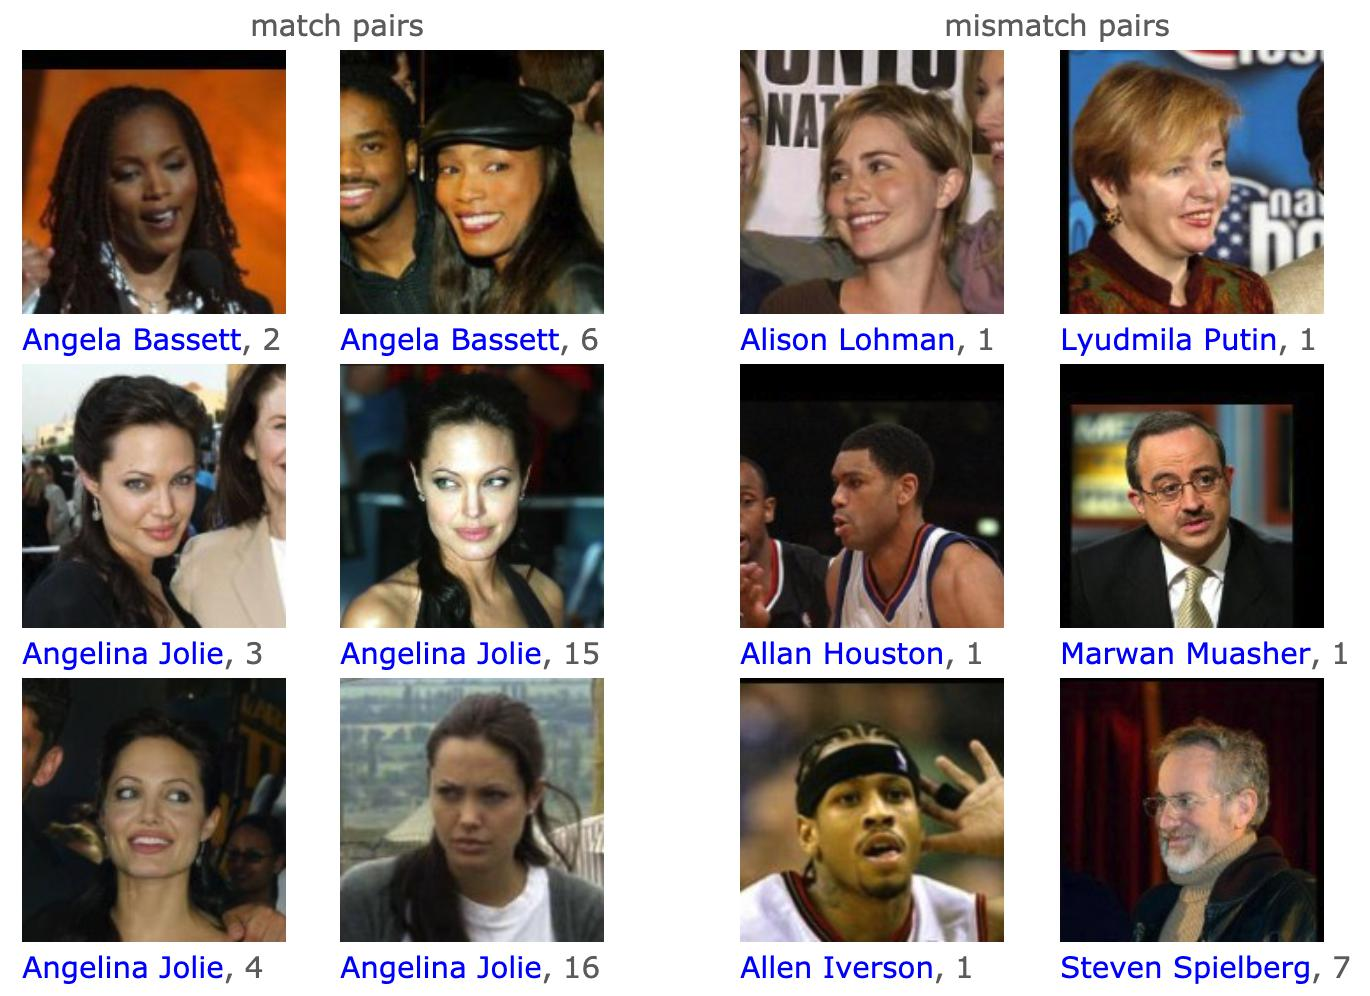

Importamos los datos y mostramos algunas imágenes de rostros

In [25]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Cargamos el dataset LFW desde scikit-learn
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Cargamos el dataset de LFW (Labeled Faces in the Wild)

In [27]:
faces = fetch_lfw_people(min_faces_per_person=60)

Vemos la descripción del dataset

In [28]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

Graficamos algunas imágenes de ejemplo

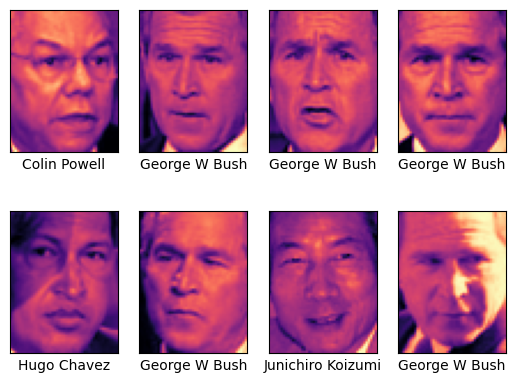

In [29]:
fig, splts = plt.subplots(2, 4)
for i, splt in enumerate(splts.flat):
    splt.imshow(faces.images[i], cmap='magma')
    splt.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

Asignamos los datos de entrada (X) y las etiquetas de salida (y)

In [30]:
X = faces.data
y = faces.target

Preparamos los datos para entrenar el modelo. Realiza holdout.

In [31]:
X.shape

(1348, 2914)

# Parte A

Aplica PCA. Usa 150 componentes y un random state de 42.

Revisa la documentación en https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [32]:
from sklearn.model_selection import train_test_split


In [33]:
# Dividir los datos: 75% entrenamiento, 25% prueba (estratificado para que se conserve la proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)

print("Número de muestras en entrenamiento:", X_train.shape[0])
print("Número de muestras en prueba:", X_test.shape[0])

Número de muestras en entrenamiento: 1011
Número de muestras en prueba: 337


In [34]:
from sklearn.decomposition import PCA
from time import time

In [35]:
n_components = 150
print("Extrayendo {} componentes (eigenfaces) de {} muestras de entrenamiento".format(n_components, X_train.shape[0]))

t0 = time()


Extrayendo 150 componentes (eigenfaces) de 1011 muestras de entrenamiento


In [36]:
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Tiempo transcurrido en PCA: {:.2f} segundos".format(time() - t0))

Tiempo transcurrido en PCA: 0.29 segundos


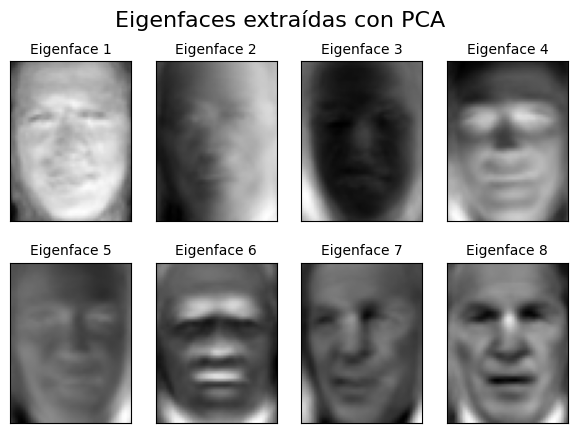

In [39]:
def plot_eigenfaces(eigenfaces, h, w, n_row=2, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title("Eigenface {}".format(i+1), size=10)
        plt.xticks(())
        plt.yticks(())
    plt.suptitle("Eigenfaces extraídas con PCA", size=16)
    plt.show()

h, w = faces.images.shape[1:3]
plot_eigenfaces(pca.components_, h, w)


Entrena dos modelos de clasificación. SVM (SVC) y KNN

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [38]:
print("Entrenando el clasificador SVM...")
t0 = time()
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm.fit(X_train_pca, y_train)
print("Tiempo de entrenamiento del SVM: {:.2f} segundos".format(time() - t0))

# Realizar predicciones sobre el conjunto de prueba
predictions_svm = svm.predict(X_test_pca)

# Imprimir reporte de clasificación y precisión
print("\nReporte de clasificación para SVM:\n")
print(classification_report(y_test, predictions_svm, target_names=faces.target_names))
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("Precisión del modelo SVM: {:.2f}%".format(accuracy_svm * 100))

Entrenando el clasificador SVM...
Tiempo de entrenamiento del SVM: 0.21 segundos

Reporte de clasificación para SVM:

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.47      0.64        19
     Colin Powell       0.64      0.95      0.77        59
  Donald Rumsfeld       0.88      0.77      0.82        30
    George W Bush       0.87      0.87      0.87       133
Gerhard Schroeder       0.83      0.89      0.86        27
      Hugo Chavez       1.00      0.50      0.67        18
Junichiro Koizumi       1.00      0.53      0.70        15
       Tony Blair       0.77      0.75      0.76        36

         accuracy                           0.81       337
        macro avg       0.87      0.72      0.76       337
     weighted avg       0.84      0.81      0.80       337

Precisión del modelo SVM: 80.71%


In [40]:
incorrect = 0
total = len(predictions_svm)

print("\nActual\t\t\tPredicción\n")
for i in range(total):
    actual_name = faces.target_names[y_test[i]]
    predicted_name = faces.target_names[predictions_svm[i]]
    if predictions_svm[i] != y_test[i]:
        incorrect += 1
        print(f"{actual_name}\t\t\t{predicted_name}")

print(f"\n{total - incorrect} clasificaciones correctas y {incorrect} incorrectas.")



Actual			Predicción

George W Bush			Colin Powell
Colin Powell			George W Bush
Hugo Chavez			Gerhard Schroeder
George W Bush			Colin Powell
Ariel Sharon			George W Bush
Gerhard Schroeder			George W Bush
Ariel Sharon			George W Bush
George W Bush			Colin Powell
Tony Blair			George W Bush
Tony Blair			George W Bush
Ariel Sharon			Gerhard Schroeder
George W Bush			Colin Powell
George W Bush			Colin Powell
Hugo Chavez			Colin Powell
Colin Powell			Tony Blair
Donald Rumsfeld			George W Bush
Gerhard Schroeder			George W Bush
George W Bush			Colin Powell
Hugo Chavez			Tony Blair
George W Bush			Tony Blair
Hugo Chavez			Gerhard Schroeder
Tony Blair			George W Bush
Junichiro Koizumi			Colin Powell
Hugo Chavez			George W Bush
George W Bush			Colin Powell
Donald Rumsfeld			Colin Powell
Tony Blair			Gerhard Schroeder
Hugo Chavez			Colin Powell
George W Bush			Colin Powell
Gerhard Schroeder			Tony Blair
Junichiro Koizumi			Colin Powell
Tony Blair			Donald Rumsfeld
Ariel Sharon			Colin Powell
Georg


Matriz de Confusión para SVM:


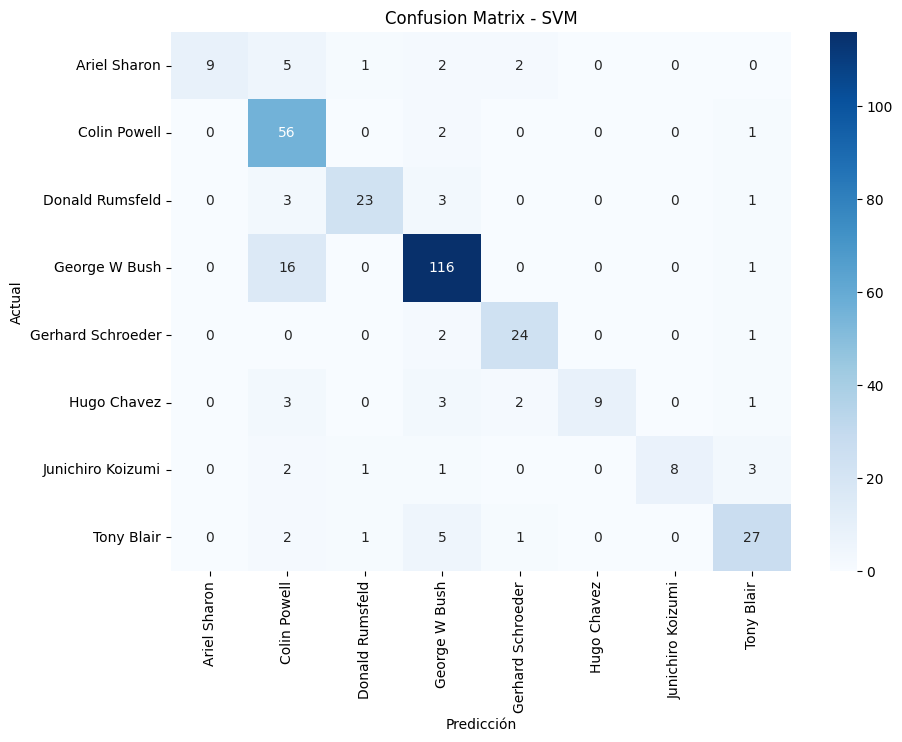

In [41]:
matrix = confusion_matrix(y_test, predictions_svm)
print("\nMatriz de Confusión para SVM:")
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("Entrenando el clasificador KNN...")
t0 = time()
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_pca, y_train)
print("Tiempo de entrenamiento del KNN: {:.2f} segundos".format(time() - t0))

# Realizar predicciones sobre el conjunto de prueba
predictions_knn = knn.predict(X_test_pca)

# Imprimir reporte de clasificación y precisión
print("\nReporte de clasificación para KNN:\n")
print(classification_report(y_test, predictions_knn, target_names=faces.target_names))
accuracy_knn = accuracy_score(y_test, predictions_knn)
print("Precisión del modelo KNN: {:.2f}%".format(accuracy_knn * 100))

Entrenando el clasificador KNN...
Tiempo de entrenamiento del KNN: 0.00 segundos

Reporte de clasificación para KNN:

                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.42      0.48        19
     Colin Powell       0.77      0.61      0.68        59
  Donald Rumsfeld       1.00      0.27      0.42        30
    George W Bush       0.57      0.97      0.72       133
Gerhard Schroeder       0.64      0.33      0.44        27
      Hugo Chavez       0.71      0.28      0.40        18
Junichiro Koizumi       1.00      0.60      0.75        15
       Tony Blair       0.82      0.25      0.38        36

         accuracy                           0.63       337
        macro avg       0.76      0.47      0.53       337
     weighted avg       0.70      0.63      0.60       337

Precisión del modelo KNN: 63.20%


In [43]:
incorrect = 0
total = len(predictions_knn)

print("\nActual\t\t\tPredicción (KNN)\n")
for i in range(total):
    actual_name = faces.target_names[y_test[i]]
    predicted_name = faces.target_names[predictions_knn[i]]
    if predictions_knn[i] != y_test[i]:
        incorrect += 1
        print(f"{actual_name}\t\t\t{predicted_name}")

print(f"\n{total - incorrect} clasificaciones correctas y {incorrect} incorrectas (KNN).")



Actual			Predicción (KNN)

Colin Powell			George W Bush
Hugo Chavez			George W Bush
Ariel Sharon			George W Bush
Gerhard Schroeder			George W Bush
Tony Blair			George W Bush
Gerhard Schroeder			George W Bush
Gerhard Schroeder			Colin Powell
Colin Powell			George W Bush
Tony Blair			Ariel Sharon
Tony Blair			George W Bush
Ariel Sharon			Gerhard Schroeder
George W Bush			Tony Blair
Donald Rumsfeld			George W Bush
Colin Powell			Ariel Sharon
Hugo Chavez			George W Bush
Ariel Sharon			George W Bush
Colin Powell			George W Bush
Tony Blair			George W Bush
Colin Powell			George W Bush
Donald Rumsfeld			George W Bush
Donald Rumsfeld			George W Bush
Donald Rumsfeld			George W Bush
Colin Powell			George W Bush
Tony Blair			George W Bush
Gerhard Schroeder			George W Bush
Tony Blair			George W Bush
Colin Powell			George W Bush
Colin Powell			George W Bush
Colin Powell			George W Bush
Tony Blair			George W Bush
Gerhard Schroeder			George W Bush
Ariel Sharon			George W Bush
Gerhard Schroeder			Geor


Matriz de Confusión para KNN:


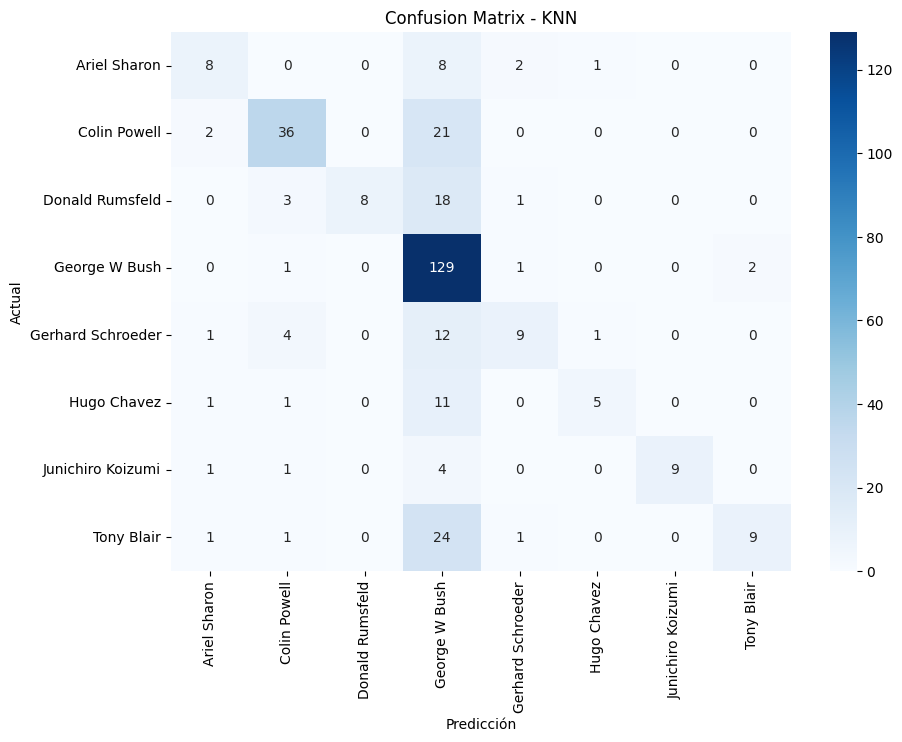

In [44]:
matrix = confusion_matrix(y_test, predictions_knn)
print("\nMatriz de Confusión para KNN:")
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()




Interpretación de Resultados:
El desempeño del modelo SVM es el esperado.
El desempeño del modelo KNN es bajo; podría mejorarse.


El siguiente bloque de codigo nos permite ver cual era la clase original y cual fue la predicción del modelo.

Probablemente te de error si usaste otros nombres para las variables. En ese caso deberás modificar el código. Por ejemplo, quiza nombraste y_target en vez de y_test.

In [ ]:
# incorrect = 0
# total = len(predictions)

# print("\nActual\t\t\Predicción\n")

# for i in range(total):
#     actual_name = faces.target_names[y_test[i]]
#     predicted_name = faces.target_names[predictions[i]]

#     if predictions[i] != y_test[i]:
#         incorrect += 1
#         print(f"{actual_name}\t\t\t{predicted_name}")

# print(f"\n{total - incorrect} clasificaciones correctas y {incorrect} incorrectas.")

Aplica la matriz de confusión

In [ ]:
# matrix = confusion_matrix(y_test, predictions)
# print("\nMatriz de confusión:")
# plt.figure(figsize=(10, 7))
# sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

Interpreta los resultados obtenidos. ¿Cuál fue el desempeño de PCA y modelo SML? ¿Cómo crees que podria mejorar el desempeño?

Nota: Es esperable que las métricas esten entrre 0.65 a 0.85

RESPUESTA:

---

In [46]:
def interpretar_resultados(model_name, accuracy):
    if 0.65 <= accuracy <= 0.85:
        interpretacion = "El desempeño del modelo {} es el esperado.".format(model_name)
    elif accuracy < 0.65:
        interpretacion = "El desempeño del modelo {} es bajo; podría mejorarse.".format(model_name)
    else:
        interpretacion = "El desempeño del modelo {} es muy alto; revisa si hay sobreajuste.".format(model_name)
    return interpretacion

print("\nInterpretación de Resultados:")
print(interpretar_resultados("SVM", accuracy_svm))
print(interpretar_resultados("KNN", accuracy_knn))


Interpretación de Resultados:
El desempeño del modelo SVM es el esperado.
El desempeño del modelo KNN es bajo; podría mejorarse.


# Parte B

* Aplica LDA
* Aplica SVM, KNN sobre los datos obtenidos de LDA (usa las mismas configuraciones)
* Obten la matriz de confusión de SVM y KNN
* Interpreta los resultados
* Interpreta la diferencia entre lo obtenido usando los valores de PCA y LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# El número máximo de componentes extraíbles con LDA es (n_classes - 1)
n_components_lda = min(n_components, n_classes - 1)
print("Aplicando LDA para obtener {} componentes discriminantes".format(n_components_lda))

lda = LDA(n_components=n_components_lda)
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_lda = lda.transform(X_test_pca)
